<a href="https://colab.research.google.com/github/DoCaoDuy/BaitapAI/blob/main/10Monan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
from os import listdir
from numpy import asarray
from numpy import save
from keras.utils import load_img , img_to_array 
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import numpy as np
from google.colab import drive
from keras.models import load_model

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


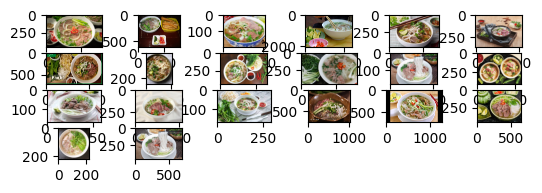

In [3]:
folder= '/content/drive/MyDrive/AnhAI/10monan/'
for i in range(20):
  plt.subplot(10,6,i+1)
  file_name=folder+'pho'+ str(i) +'.jpg'
  img=imread(file_name)
  plt.imshow(img)
plt.show()

In [8]:
import os
photos, labels = list(), list()
for file in os.listdir(folder):
  if os.path.isdir(os.path.join(folder, file)):  
    continue
  if file.startswith('bc'): #banhcuon
    output = 0
  elif file.startswith('bk'): #banhkem
    output = 1
  elif file.startswith('bm'): #banhmi
    output = 2
  elif file.startswith('bx'): #banhxeo
    output = 3
  elif file.startswith('c'): #chao
    output = 4
  elif file.startswith('ca'): #ca
    output = 5
  elif file.startswith('gn'): #ganuong
    output = 6
  elif file.startswith('h'): #heonuong
    output = 7
  elif file.startswith('ml'): #milo
    output = 8
  elif file.startswith('pho'): #pho
    output = 9
  photo = load_img(folder+file,target_size=(200,200))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

classes = ["banhcuon","banhkem","banhmi","banhxeo","chao","ca","ganuong","heo","milo","pho"]
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)

save('10monan.npy', photos)
save('10monan_label.npy', labels)


(270, 200, 200, 3) (270,)


In [40]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(photos, labels, epochs=20, batch_size=512, verbose=1)



Epoch 1/20
1/1 [==============================] - 10s 10s/step - loss: 185.1012 - accuracy: 0.1259
Epoch 2/20
1/1 [==============================] - 0s 309ms/step - loss: 4959.4727 - accuracy: 0.0963
Epoch 3/20
1/1 [==============================] - 0s 311ms/step - loss: 2852.6089 - accuracy: 0.0963
Epoch 4/20
1/1 [==============================] - 0s 305ms/step - loss: 2593.2432 - accuracy: 0.1111
Epoch 5/20
1/1 [==============================] - 0s 309ms/step - loss: 1161.5885 - accuracy: 0.0963
Epoch 6/20
1/1 [==============================] - 0s 314ms/step - loss: 639.9740 - accuracy: 0.1926
Epoch 7/20
1/1 [==============================] - 0s 344ms/step - loss: 336.0010 - accuracy: 0.1704
Epoch 8/20
1/1 [==============================] - 0s 332ms/step - loss: 189.0844 - accuracy: 0.1000
Epoch 9/20
1/1 [==============================] - 0s 321ms/step - loss: 166.7655 - accuracy: 0.0963
Epoch 10/20
1/1 [==============================] - 0s 345ms/step - loss: 83.6340 - accuracy: 0.09

In [41]:
model.evaluate(photos,labels)

9/9 [==============================] - 0s 19ms/step - loss: 0.3558 - accuracy: 0.9222


[0.3558238446712494, 0.9222221970558167]

1/1 [==============================] - 0s 72ms/step


'pho'

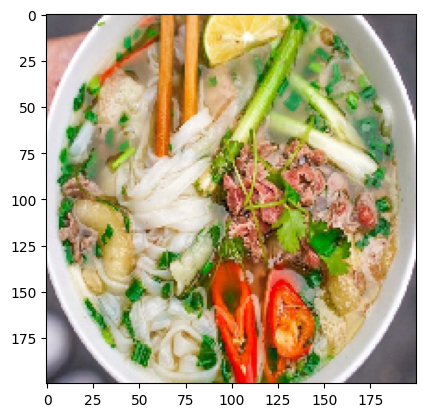

In [20]:
img = load_img('/content/drive/MyDrive/AnhAI/10monan/pho25.jpg', target_size=(200,200))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
#print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

1/1 [==============================] - 0s 21ms/step


'banhmi'

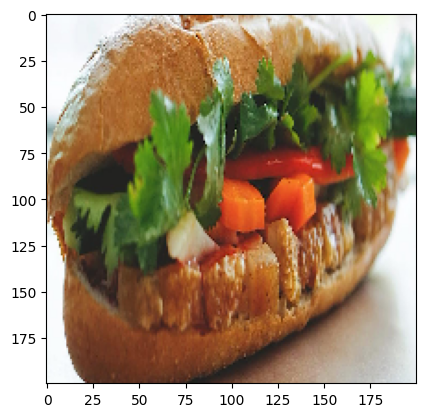

In [23]:
img = load_img('/content/drive/MyDrive/AnhAI/10monan/bm25.jpg', target_size=(200,200))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
#print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

1/1 [==============================] - 0s 18ms/step


'banhcuon'

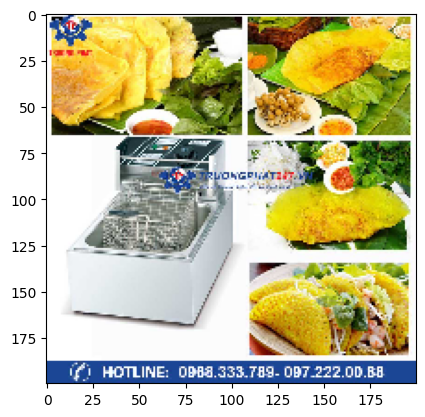

In [24]:
img = load_img('/content/drive/MyDrive/AnhAI/10monan/bx25.jpg', target_size=(200,200))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
#print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

1/1 [==============================] - 0s 22ms/step


'banhcuon'

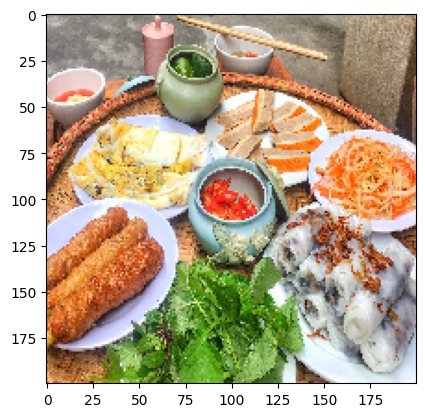

In [26]:
img = load_img('/content/drive/MyDrive/AnhAI/10monan/bc25.jpg', target_size=(200,200))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
#print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]